# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import requests
import time
import datetime
from datetime import datetime
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
settings = {"units": "imperial", "appid": api_key}

WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                     "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [20]:

count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data
sets = 0 # counter to count the number of call sets
index = 0 # index for the WeatherPy df

#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | bonthe
http://api.openweathermap.org/data/2.5/weather?q=bonthe&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 2 of Set 0 | reefton
http://api.openweathermap.org/data/2.5/weather?q=reefton&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 3 of Set 0 | omboue
http://api.openweathermap.org/data/2.5/weather?q=omboue&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa


C:\Users\gunte\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\gunte\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\gunte\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\gunte\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\gunte\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: Future

Processing Record 4 of Set 0 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar%20del%20plata&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 5 of Set 0 | padang
http://api.openweathermap.org/data/2.5/weather?q=padang&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 6 of Set 0 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?q=imeni%20poliny%20osipenko&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 7 of Set 0 | maunatlala
http://api.openweathermap.org/data/2.5/weather?q=maunatlala&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 8 of Set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 9 of Set 0 | beyneu
http://api.openweathermap.org/data/2.5/weather?q=beyneu&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 10 of Set 0 | flin flon
http://a

Processing Record 7 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?q=pisco&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 8 of Set 1 | saint-georges
http://api.openweathermap.org/data/2.5/weather?q=saint-georges&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 9 of Set 1 | ukiah
http://api.openweathermap.org/data/2.5/weather?q=ukiah&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 10 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 11 of Set 1 | hami
http://api.openweathermap.org/data/2.5/weather?q=hami&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 12 of Set 1 | akyab
http://api.openweathermap.org/data/2.5/weather?q=akyab&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 13 of Set 1 | nishihara
http://api.openweathermap.org/d

Processing Record 10 of Set 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 11 of Set 2 | mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 12 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 13 of Set 2 | narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 14 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial%20do%20cabo&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 15 of Set 2 | salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 16 of Set 2 | buraydah
http://api.openweat

Processing Record 13 of Set 3 | pangai
http://api.openweathermap.org/data/2.5/weather?q=pangai&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 14 of Set 3 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 15 of Set 3 | topolobampo
http://api.openweathermap.org/data/2.5/weather?q=topolobampo&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 16 of Set 3 | barentu
http://api.openweathermap.org/data/2.5/weather?q=barentu&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 17 of Set 3 | chilca
http://api.openweathermap.org/data/2.5/weather?q=chilca&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 18 of Set 3 | khvorostyanka
http://api.openweathermap.org/data/2.5/weather?q=khvorostyanka&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 19 of Set 3 | cherskiy
http://api.openweathermap.org/data/2.5/we

Processing Record 17 of Set 4 | taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 18 of Set 4 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero%20negro&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 19 of Set 4 | azare
http://api.openweathermap.org/data/2.5/weather?q=azare&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 20 of Set 4 | pemangkat
http://api.openweathermap.org/data/2.5/weather?q=pemangkat&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 21 of Set 4 | basco
http://api.openweathermap.org/data/2.5/weather?q=basco&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 22 of Set 4 | alofi
http://api.openweathermap.org/data/2.5/weather?q=alofi&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 23 of Set 4 | brae
http://api.openweat

Processing Record 20 of Set 5 | ternate
http://api.openweathermap.org/data/2.5/weather?q=ternate&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 21 of Set 5 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 22 of Set 5 | kyela
http://api.openweathermap.org/data/2.5/weather?q=kyela&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 23 of Set 5 | vostok
http://api.openweathermap.org/data/2.5/weather?q=vostok&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 24 of Set 5 | mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount%20gambier&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 25 of Set 5 | jizan
http://api.openweathermap.org/data/2.5/weather?q=jizan&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 26 of Set 5 | wawa
http://api.openweathermap.org/data/2.5/weathe

Processing Record 24 of Set 6 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 25 of Set 6 | coihaique
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 26 of Set 6 | beira
http://api.openweathermap.org/data/2.5/weather?q=beira&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 27 of Set 6 | patos de minas
http://api.openweathermap.org/data/2.5/weather?q=patos%20de%20minas&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 28 of Set 6 | mangalia
http://api.openweathermap.org/data/2.5/weather?q=mangalia&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 29 of Set 6 | college
http://api.openweathermap.org/data/2.5/weather?q=college&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 30 of Set 6 | soe
ht

Processing Record 29 of Set 7 | naze
http://api.openweathermap.org/data/2.5/weather?q=naze&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 30 of Set 7 | kirensk
http://api.openweathermap.org/data/2.5/weather?q=kirensk&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 31 of Set 7 | paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 32 of Set 7 | tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 33 of Set 7 | teya
http://api.openweathermap.org/data/2.5/weather?q=teya&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 34 of Set 7 | boa vista
http://api.openweathermap.org/data/2.5/weather?q=boa%20vista&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 35 of Set 7 | mezen
http://api.openweathermap.org/data

Processing Record 33 of Set 8 | uspenka
http://api.openweathermap.org/data/2.5/weather?q=uspenka&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 34 of Set 8 | cambridge
http://api.openweathermap.org/data/2.5/weather?q=cambridge&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 35 of Set 8 | helong
http://api.openweathermap.org/data/2.5/weather?q=helong&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 36 of Set 8 | obo
http://api.openweathermap.org/data/2.5/weather?q=obo&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 37 of Set 8 | omsukchan
http://api.openweathermap.org/data/2.5/weather?q=omsukchan&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 38 of Set 8 | maceio
http://api.openweathermap.org/data/2.5/weather?q=maceio&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 39 of Set 8 | karlstadt
http://api.openweathermap.org/data/2.5/weather?q=karlsta

Processing Record 38 of Set 9 | bay saint louis
http://api.openweathermap.org/data/2.5/weather?q=bay%20saint%20louis&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 39 of Set 9 | broome
http://api.openweathermap.org/data/2.5/weather?q=broome&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 40 of Set 9 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?q=bolungarvik&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 41 of Set 9 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?q=bambanglipuro&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 42 of Set 9 | whitecourt
http://api.openweathermap.org/data/2.5/weather?q=whitecourt&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 43 of Set 9 | paka
http://api.openweathermap.org/data/2.5/weather?q=paka&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 44 of Set 9 

Processing Record 42 of Set 10 | kathu
http://api.openweathermap.org/data/2.5/weather?q=kathu&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 43 of Set 10 | santa cruz
http://api.openweathermap.org/data/2.5/weather?q=santa%20cruz&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 44 of Set 10 | boda
http://api.openweathermap.org/data/2.5/weather?q=boda&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 45 of Set 10 | yaan
http://api.openweathermap.org/data/2.5/weather?q=yaan&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 46 of Set 10 | yeletskiy
http://api.openweathermap.org/data/2.5/weather?q=yeletskiy&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
HTTP Error 404: Not Found
Processing Record 47 of Set 10 | racine
http://api.openweathermap.org/data/2.5/weather?q=racine&units=imperial&APPID=a02d2be2ae24cad7513a3ed3582201fa
Processing Record 48 of Set 10 | chuy
http://api.openweathermap.org/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
WeatherPy_df.to_csv("city_data.csv", encoding='utf-8', index=False)

WeatherPy_df.head()

,City,Cloudiness,Country,Max Temp,Wind Speed,Lat,Lng,Humidity,Date
0,Bonthe,11,SL,83.07,10.58,7.53,-12.5,71,1.577386e+09
1,Omboue,90,GA,77.02,3.4,-1.57,9.26,90,1.577386e+09
2,Mar del Plata,32,AR,73.2,21.65,-46.43,-67.52,27,1.577386e+09
3,Padang,100,ID,68.58,2.68,-0.92,100.36,93,1.577386e+09
4,Imeni Poliny Osipenko,99,RU,-15.47,1.95,52.42,136.49,97,1.577386e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

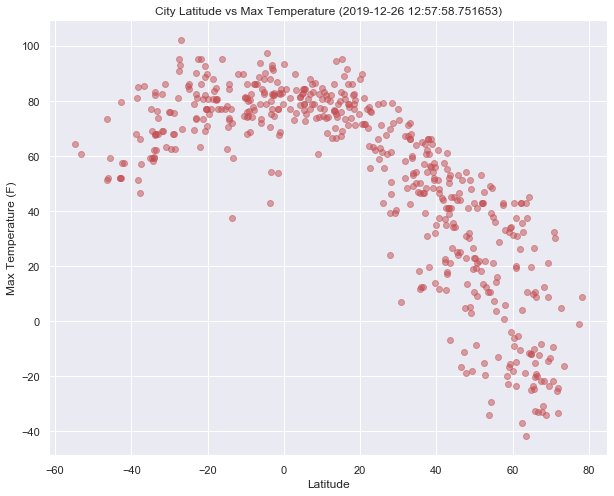

In [39]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({datetime.today()})")
plt.savefig("LatitudeTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

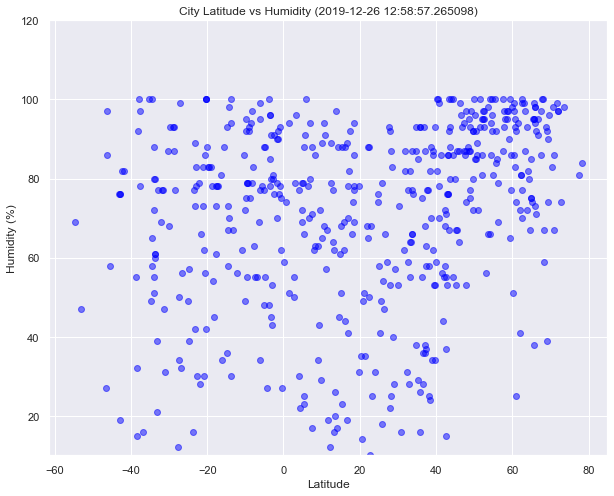

In [40]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.today()})')
plt.savefig("LatitudeHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

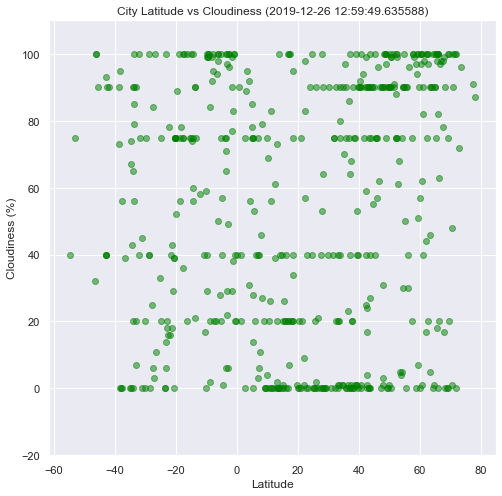

In [41]:

plt.figure(figsize=(8,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.today()})')
plt.savefig("LatitudeCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

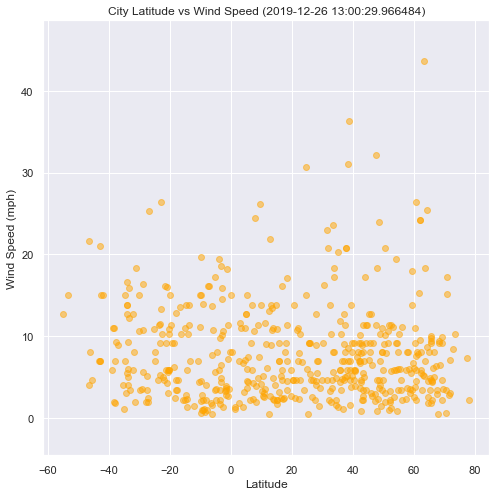

In [44]:

plt.figure(figsize=(8,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.today()})')
plt.savefig("LatitudeWind.png")
plt.show()